# Features in the dataset

Pregnancies: Number of times pregnant  <br />
Glucose: Plasma glucose concentration  <br />
Blood Pressure: Diastolic blood pressure (mm Hg)  <br />
Skin Thickness: Triceps skin fold thickness (mm)  <br />
Insulin: 2-Hour serum insulin (mu U/ml)  <br />
BMI: Body Mass Index (weight in kg/(height in m)^2)  <br />
Diabetes Predigree Function  <br />
Age: Age in years <br />
target: 1 (Patient has diabetes) or 0 (Patient does not have diabetes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/aniru/OneDrive/Desktop/Machine-Learning-master/Diabetes Prediction/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df2 = df[(df['Glucose']>0) & (df['BloodPressure']>0) & (df['SkinThickness']>0) & (df['Insulin']>0) & (df['BMI']>0)]

In [5]:
desc = df2.describe().transpose()
desc

,count,mean,std,min,25%,50%,75%,max
Pregnancies,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
Glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
BloodPressure,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
SkinThickness,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
Insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
BMI,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
DiabetesPedigreeFunction,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
Age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
Outcome,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00


In [6]:
Have_Diabetes = df[(df['Outcome']==0)].count()[1]
No_Diabetes = df[(df['Outcome']==1)].count()[1]

print(Have_Diabetes)
print(No_Diabetes)

500
268


### Data Visualization

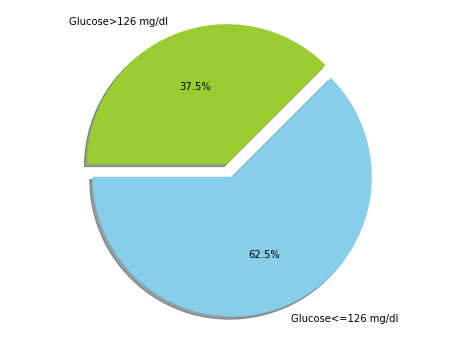

In [7]:
plt.figure(figsize=(8,6))

labels = 'Glucose<=126 mg/dl','Glucose>126 mg/dl'
sizes = [len(df[df['Glucose'] <= 126]),len(df[df['Glucose'] >126])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1,0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

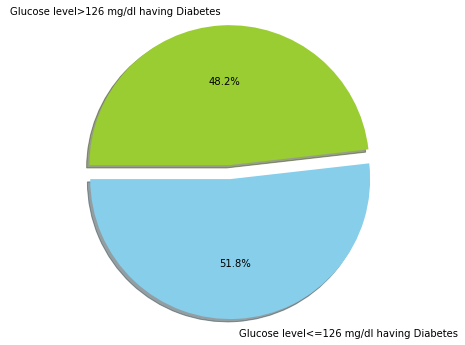

In [8]:
plt.figure(figsize=(8,6))

labels = 'Glucose level<=126 mg/dl having Diabetes','Glucose level>126 mg/dl having Diabetes'
sizes = [len(df[df['Glucose']>126]),len(df[df['Outcome']==1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1,0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

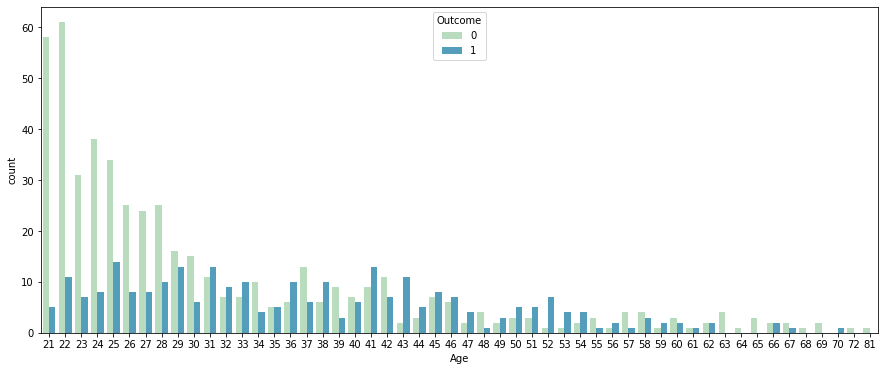

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age',data = df, hue = 'Outcome',palette='GnBu')
plt.show()

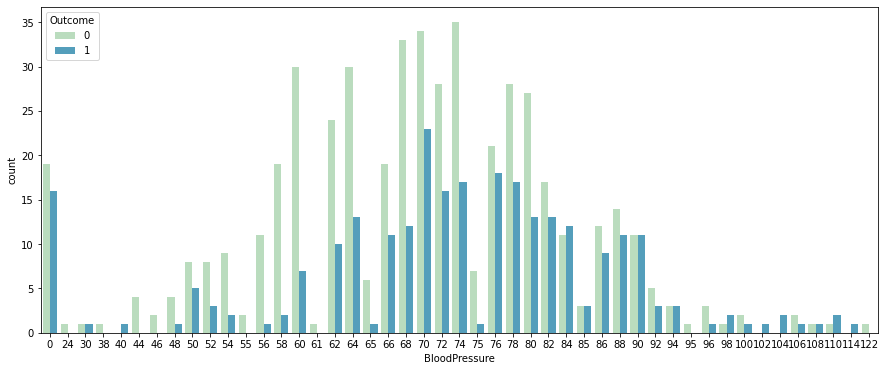

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(x='BloodPressure',data = df, hue = 'Outcome',palette='GnBu')
plt.show()

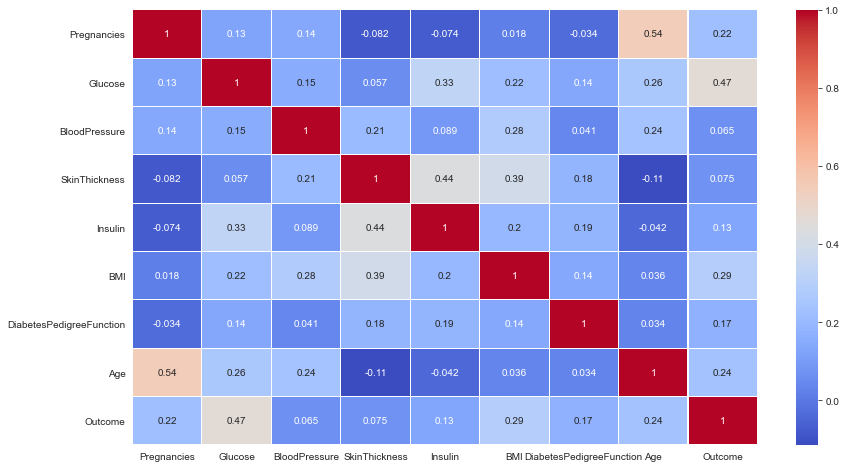

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

### Model creation Using Decision Tree algorithm

In [12]:
X = df.iloc[:,[1,5]].values 
y = df.iloc[:, -1].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_test_inverse = sc.inverse_transform(X_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'gini',max_depth=8, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [17]:
y_pred = classifier.predict(X_test)

[[109  21]
 [ 34  28]]


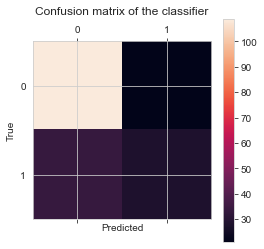

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       130
           1       0.57      0.45      0.50        62

    accuracy                           0.71       192
   macro avg       0.67      0.65      0.65       192
weighted avg       0.70      0.71      0.70       192



### Model creation Using Random Forest

In [20]:
X1 = df.iloc[:,[1,5]].values
y1 = df.iloc[:,-1].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, random_state = 0)

In [27]:
from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier(n_estimators = 2, criterion = 'gini',max_depth = 8 ,random_state = 0)
classifier1.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=8, n_estimators=2, random_state=0)

In [28]:
sc1 = StandardScaler()

X_train1 = sc1.fit_transform(X_train1)
X_test1 = sc1.transform(X_test1)

In [29]:
X_test_inverse1 = sc.inverse_transform(X_test1)

In [30]:
y_pred1 = classifier1.predict(X_test1)

[[115  15]
 [ 31  31]]


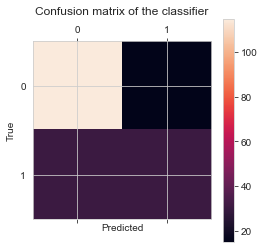

In [31]:
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm1)

plt.matshow(cm1)
plt.title('Confusion matrix of the classifier\n')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

In [32]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.67      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192

